# We simply want to attempt tracking players

In [54]:

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time
from PIL import Image, ImageFont, ImageDraw

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
tracker = cv2.TrackerMIL_create()

In [179]:
cap = cv2.VideoCapture('/data/soccer_video/filmrole1.avi')

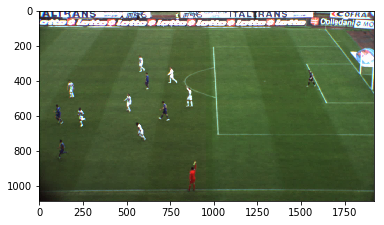

In [43]:
ret, draw = cap.read()
bgr = cv2.cvtColor(draw, cv2.COLOR_RGB2BGR)
plt.imshow(bgr)

In [9]:
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [10]:
length

3002

In [13]:
fps = cap.get(cv2.CAP_PROP_FPS)

In [14]:
fps

25.0

In [214]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 29)

True

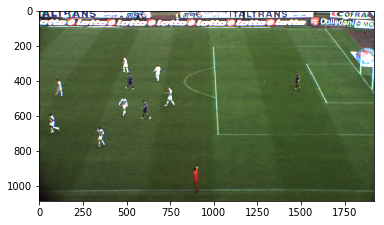

In [215]:
ret, draw = cap.read()
bgr = cv2.cvtColor(draw, cv2.COLOR_RGB2BGR)
plt.imshow(bgr)

In [216]:
bbox = (480, 265, 40, 90)

In [217]:
p1 = (int(bbox[0]), int(bbox[1]))
p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
r = cv2.rectangle(bgr, p1, p2, (0,0,255), 5, cv2.LINE_AA)

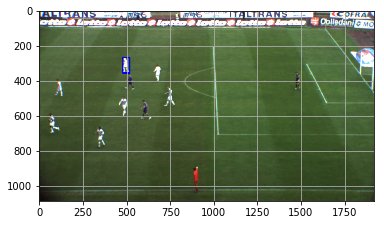

In [218]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both')
plt.imshow(bgr)

In [123]:
tracker = cv2.TrackerMIL_create()
ok = tracker.init(bgr, bbox)

In [124]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 40)

True

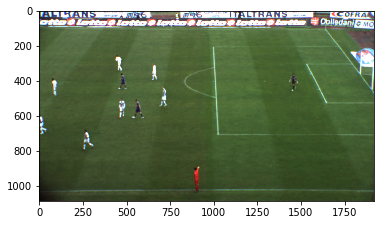

In [125]:
ret, draw = cap.read()
bgr2 = cv2.cvtColor(draw, cv2.COLOR_RGB2BGR)
plt.imshow(bgr2)

In [126]:
ok, bbox = tracker.update(bgr2)

In [127]:
ok

True

In [128]:
p1 = (int(bbox[0]), int(bbox[1]))
p2 = (int(bbox[2]), int(bbox[3]))
r = cv2.rectangle(bgr2, p1, p2, (0,0,255), 5, cv2.LINE_AA)

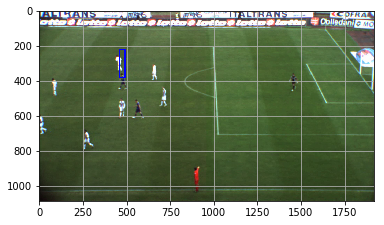

In [129]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(which='both')
plt.imshow(bgr2)

In [130]:
bbox

(493.0, 221.0, 460.0, 380.0)

In [225]:
cap = cv2.VideoCapture('/data/soccer_video/filmrole1.avi')
cap.set(cv2.CAP_PROP_POS_FRAMES, 29)
tracker = cv2.TrackerMIL_create()

ret, draw = cap.read()
bgr = cv2.cvtColor(draw, cv2.COLOR_RGB2BGR)

bbox = (480, 265, 40, 90)
ok = tracker.init(bgr, bbox)

for frame_pos in range(30, int( length/2 ), 2):
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_pos)
    ret, draw = cap.read()
    bgr = cv2.cvtColor(draw, cv2.COLOR_RGB2BGR)
    
    ok, bbox = tracker.update(bgr)
    
    if ok:
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        r = cv2.rectangle(bgr, p1, p2, (0,0,255), 5, cv2.LINE_AA)
    else:
        print("tracker failed")
        break

    file_path = '/data/su_buildup/player_tracking/data/tracking1/' + f'{frame_pos:06}' + '.jpg'
    print('writing to file: ', file_path)
    print('bbox: ', bbox)
    cv2.imwrite(file_path, bgr)

    

writing to file:  /data/su_buildup/player_tracking/data/tracking1/000030.jpg
bbox:  (477.0, 265.0, 40.0, 90.0)
writing to file:  /data/su_buildup/player_tracking/data/tracking1/000032.jpg
bbox:  (470.0, 264.0, 40.0, 90.0)
writing to file:  /data/su_buildup/player_tracking/data/tracking1/000034.jpg
bbox:  (465.0, 267.0, 40.0, 90.0)
writing to file:  /data/su_buildup/player_tracking/data/tracking1/000036.jpg
bbox:  (458.0, 276.0, 40.0, 90.0)
writing to file:  /data/su_buildup/player_tracking/data/tracking1/000038.jpg
bbox:  (451.0, 271.0, 40.0, 90.0)
writing to file:  /data/su_buildup/player_tracking/data/tracking1/000040.jpg
bbox:  (445.0, 273.0, 40.0, 90.0)
writing to file:  /data/su_buildup/player_tracking/data/tracking1/000042.jpg
bbox:  (439.0, 262.0, 40.0, 90.0)
writing to file:  /data/su_buildup/player_tracking/data/tracking1/000044.jpg
bbox:  (430.0, 257.0, 40.0, 90.0)
writing to file:  /data/su_buildup/player_tracking/data/tracking1/000046.jpg
bbox:  (422.0, 247.0, 40.0, 90.0)
w

KeyboardInterrupt: 

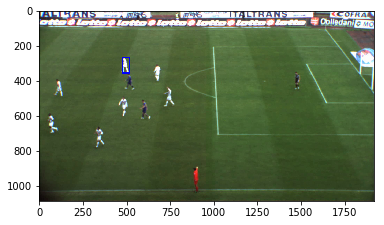

In [226]:
img = cv2.imread('/data/su_buildup/player_tracking/data/tracking1/000030.jpg')
plt.imshow(img)

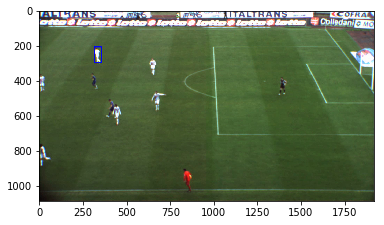

In [228]:
img = cv2.imread('/data/su_buildup/player_tracking/data/tracking1/000076.jpg')
plt.imshow(img)